In [1]:
from sdv.single_table import TVAESynthesizer
import pandas as pd
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from table_evaluator import TableEvaluator
from pycaret.classification import *

In [2]:
real_data = pd.read_csv('TCGA_InfoWithGrade.csv')

In [3]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

In [4]:
# Create metadata for the dataset
metadata = SingleTableMetadata()

# Fit metadata to the real dataset
metadata.detect_from_dataframe(data=real_data)

In [5]:
real_data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
real_data.columns

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')

In [7]:
# Names of the columns that are discrete
discrete_columns = ['Grade', 'Gender', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA']

synthesizer = TVAESynthesizer(
    metadata,                   # required metadata object
    enforce_min_max_values=True,  # Ensures synthetic numerical values lie within the real data ranges
    enforce_rounding=False,       # Adjust rounding behavior (set to True if you want the same decimals)
    epochs=500,                   # Number of training epochs; adjust based on dataset complexity
    verbose=False,                # Set to True to see training progress
    cuda=True                     # Use GPU acceleration if available
)

synthesizer.fit(real_data)

synthetic_data = synthesizer.sample(num_rows=839)


In [8]:
synthetic_data.head()


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,21.019197,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,71.140234,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,31.114306,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,65.618988,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,27.134672,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1540.04it/s]|
Column Shapes Score: 94.63%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 236.71it/s]|
Column Pair Trends Score: 89.9%

Overall Score (Average): 92.26%



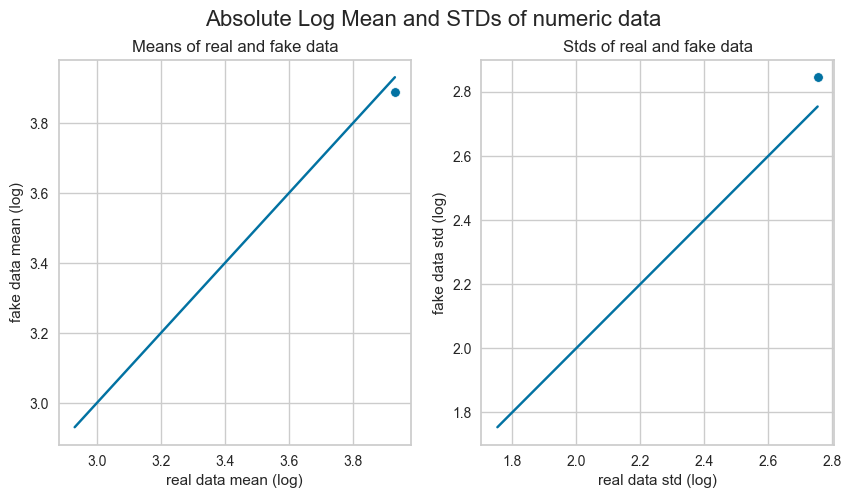

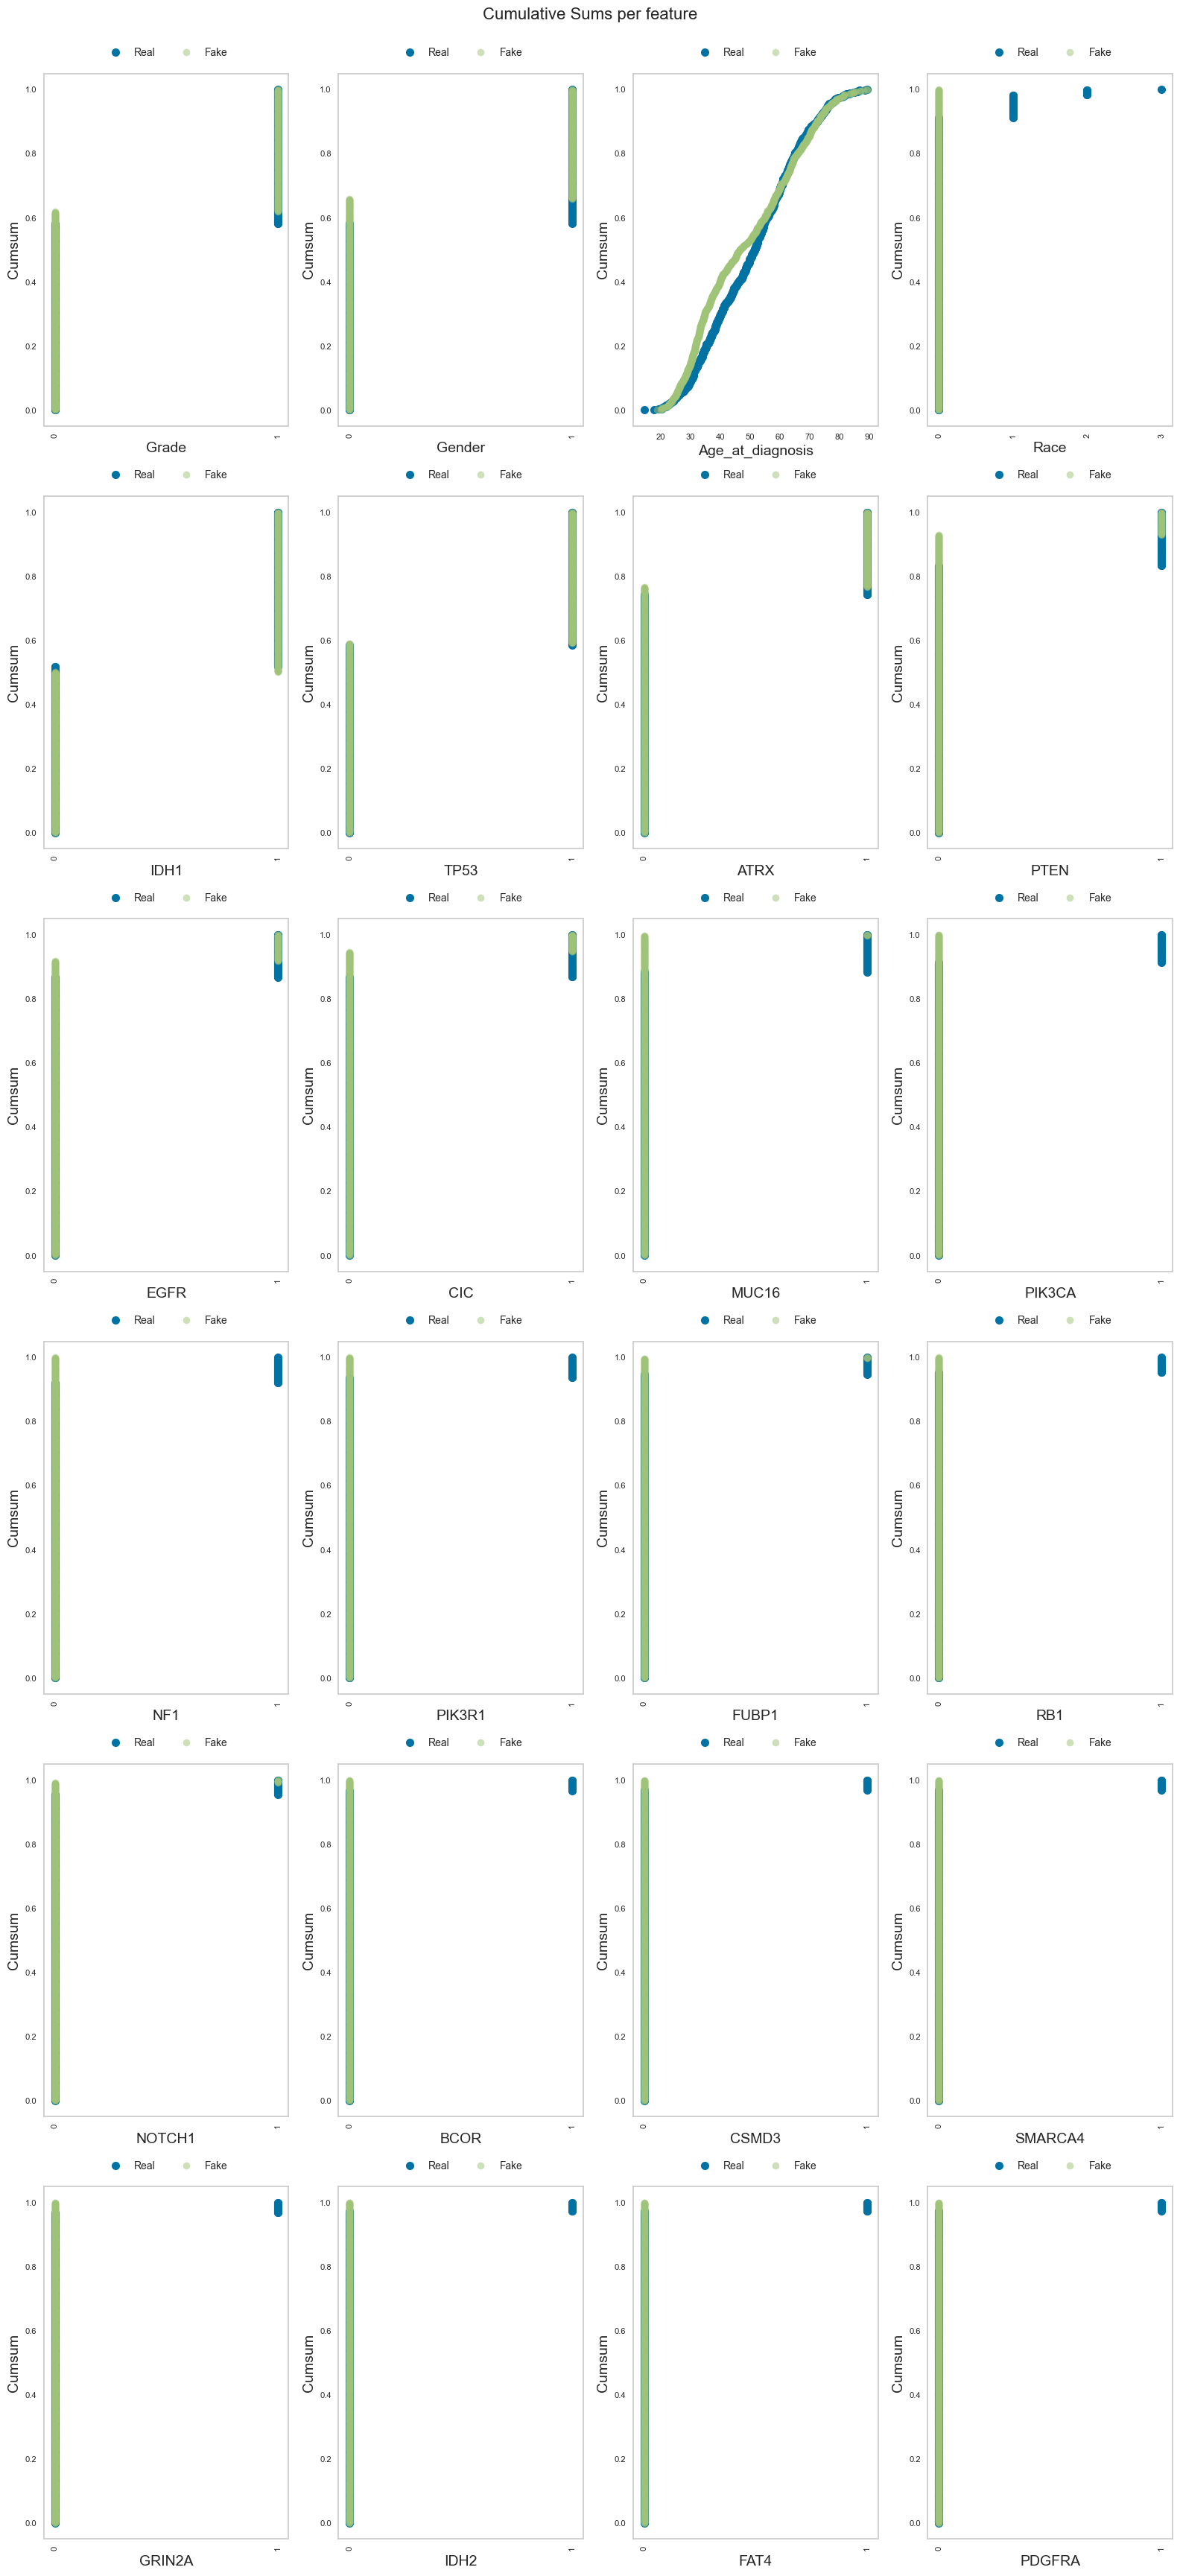

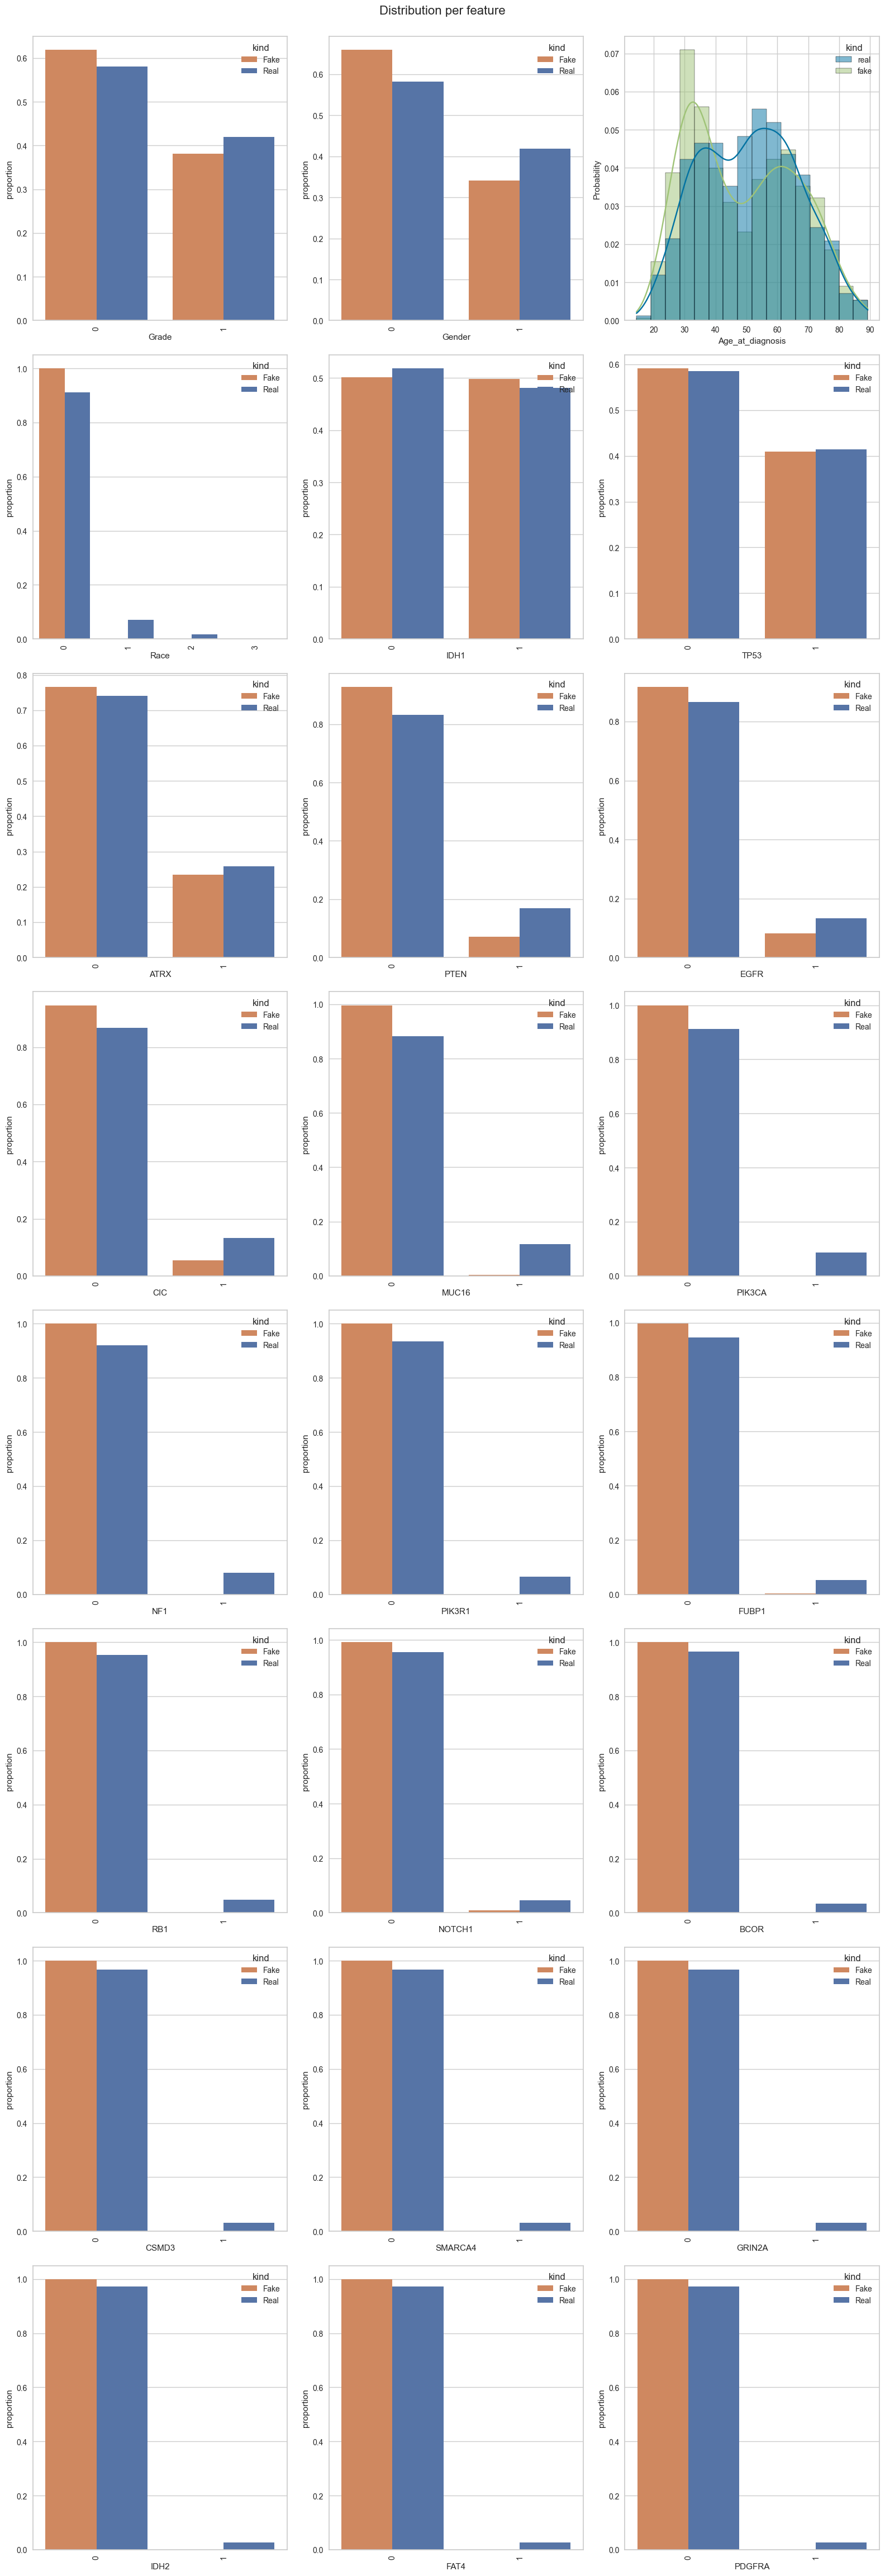

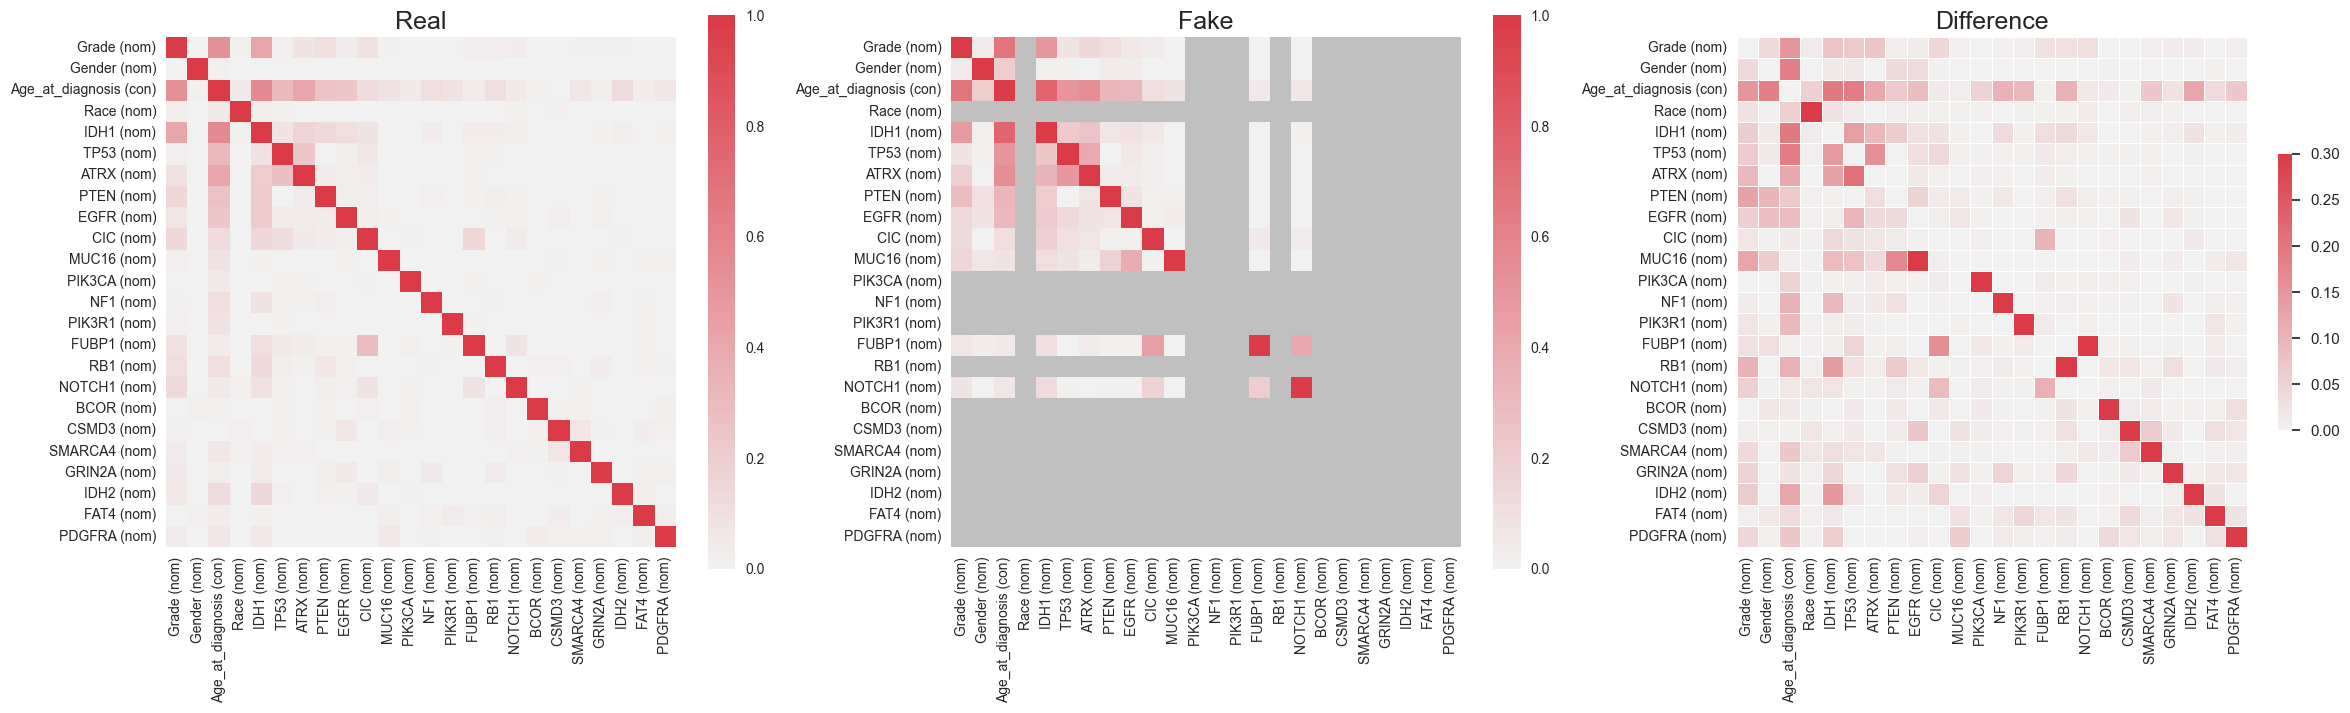

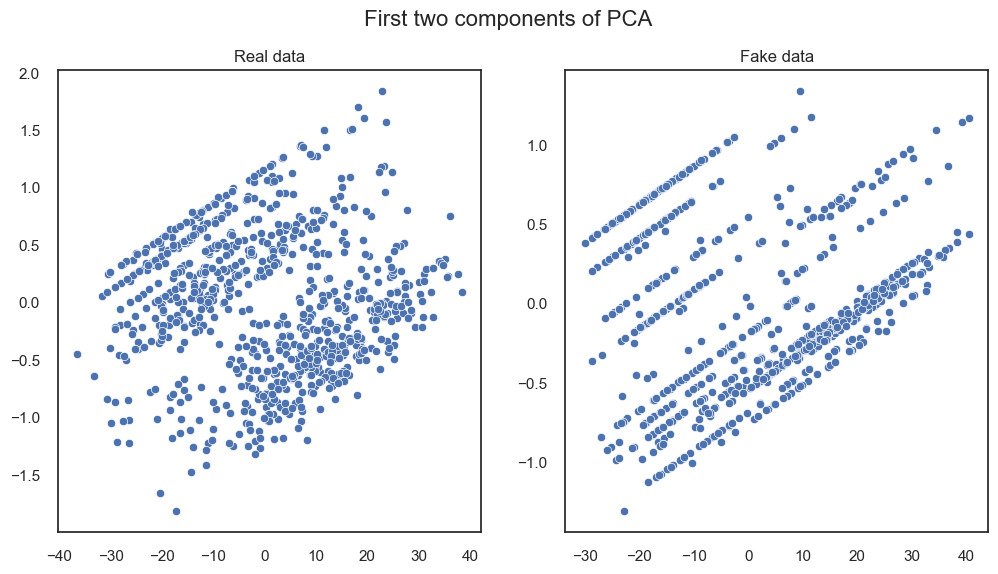

In [10]:
table_evaluator = TableEvaluator(real_data, synthetic_data, cat_cols = discrete_columns)
table_evaluator.visual_evaluation()

In [11]:
from pycaret.classification import *

In [12]:
s = setup(data=synthetic_data, target =  'Grade', test_data=real_data, index=False, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Grade
2,Target type,Binary
3,Original data shape,"(1678, 24)"
4,Transformed data shape,"(1678, 24)"
5,Transformed train set shape,"(839, 24)"
6,Transformed test set shape,"(839, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [13]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8892,0.9393,0.9094,0.8240,0.8619,0.7699,0.7762,0.0230
gbc,Gradient Boosting Classifier,0.8880,0.9482,0.8906,0.8344,0.8573,0.7656,0.7720,0.0290
lr,Logistic Regression,0.8809,0.9455,0.9062,0.8112,0.8514,0.7528,0.7624,0.1450
ridge,Ridge Classifier,0.8784,0.9428,0.9562,0.7814,0.8581,0.7542,0.7689,0.0080
lda,Linear Discriminant Analysis,0.8784,0.9430,0.9594,0.7805,0.8588,0.7546,0.7700,0.0070
lightgbm,Light Gradient Boosting Machine,0.8761,0.9399,0.8625,0.8273,0.8409,0.7397,0.7446,0.0780
knn,K Neighbors Classifier,0.8617,0.9143,0.8594,0.8011,0.8250,0.7113,0.7174,0.1010
nb,Naive Bayes,0.8594,0.9274,0.9688,0.7470,0.8417,0.7199,0.7423,0.0080
dt,Decision Tree Classifier,0.8534,0.8431,0.8000,0.8169,0.8047,0.6877,0.6915,0.0080
svm,SVM - Linear Kernel,0.8510,0.9264,0.8531,0.7916,0.8114,0.6896,0.7030,0.0080


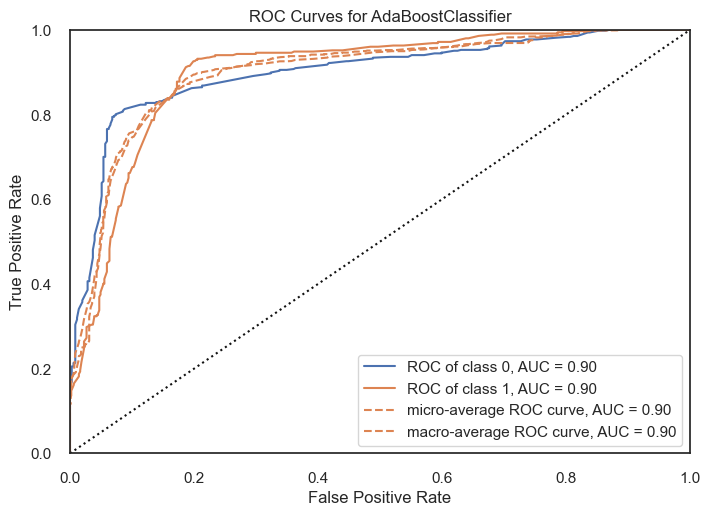

In [14]:
plot_model(best, plot = 'auc')

In [15]:
s = setup(real_data, target =  'Grade', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Grade
2,Target type,Binary
3,Original data shape,"(839, 24)"
4,Transformed data shape,"(839, 24)"
5,Transformed train set shape,"(587, 24)"
6,Transformed test set shape,"(252, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [16]:
# functional API
best_real = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8705,0.9186,0.9020,0.8168,0.8540,0.7385,0.7463,0.0110
ridge,Ridge Classifier,0.8705,0.9195,0.9183,0.8077,0.8570,0.7401,0.7490,0.0090
lda,Linear Discriminant Analysis,0.8705,0.9204,0.9183,0.8077,0.8570,0.7401,0.7490,0.0090
gbc,Gradient Boosting Classifier,0.8534,0.9174,0.8853,0.7958,0.8356,0.7044,0.7115,0.0310
ada,Ada Boost Classifier,0.8483,0.9080,0.8568,0.8048,0.8257,0.6921,0.6989,0.0230
rf,Random Forest Classifier,0.8331,0.8925,0.8333,0.7905,0.8066,0.6605,0.6676,0.0400
lightgbm,Light Gradient Boosting Machine,0.8177,0.8871,0.8048,0.7809,0.7879,0.6289,0.6351,0.0660
et,Extra Trees Classifier,0.8092,0.8718,0.7928,0.7704,0.7751,0.6103,0.6184,0.0350
nb,Naive Bayes,0.7908,0.8798,0.9350,0.7038,0.7969,0.5980,0.6288,0.0090
knn,K Neighbors Classifier,0.7906,0.8399,0.7557,0.7524,0.7511,0.5706,0.5741,0.0180


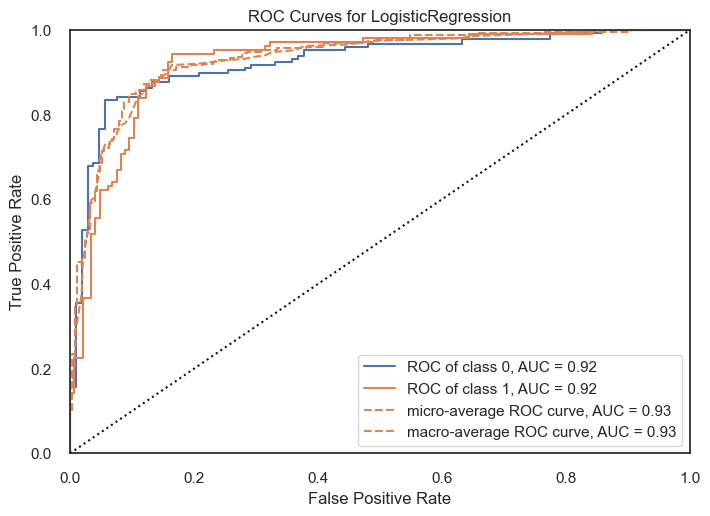

In [17]:
plot_model(best_real, plot = 'auc')